# Lab 5: Analyzing Student Grades for Math and Portugese Classes

In this notebook, we will analyze student data containing a variety of attributes (including interest in more school, social life, family life, etc.) and how these attributes impact grades.

## 1. Statistical Tasks

Imports:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

Load the data:

In [3]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

Determine the rows and columns of each file:

In [4]:
df_mat.shape

(395, 33)

df_por.shape

This shows that both files have 33 columns. Student-mat (for math) has 395 rows and student-por has 649 rows.

Load the data types for student-mat. They should be the same as student-por but we will verify this to confirm:

In [8]:
numeric = df_mat.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df_mat.select_dtypes(include=['object']).columns.tolist()

The numeric attributes:

In [15]:
numeric

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

The categorical attributes:

In [10]:
categorical

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [11]:
numeric2 = df_por.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical2 = df_por.select_dtypes(include=['object']).columns.tolist()

In [12]:
numeric2

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [13]:
categorical2

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

We will build correlation tables for the data:

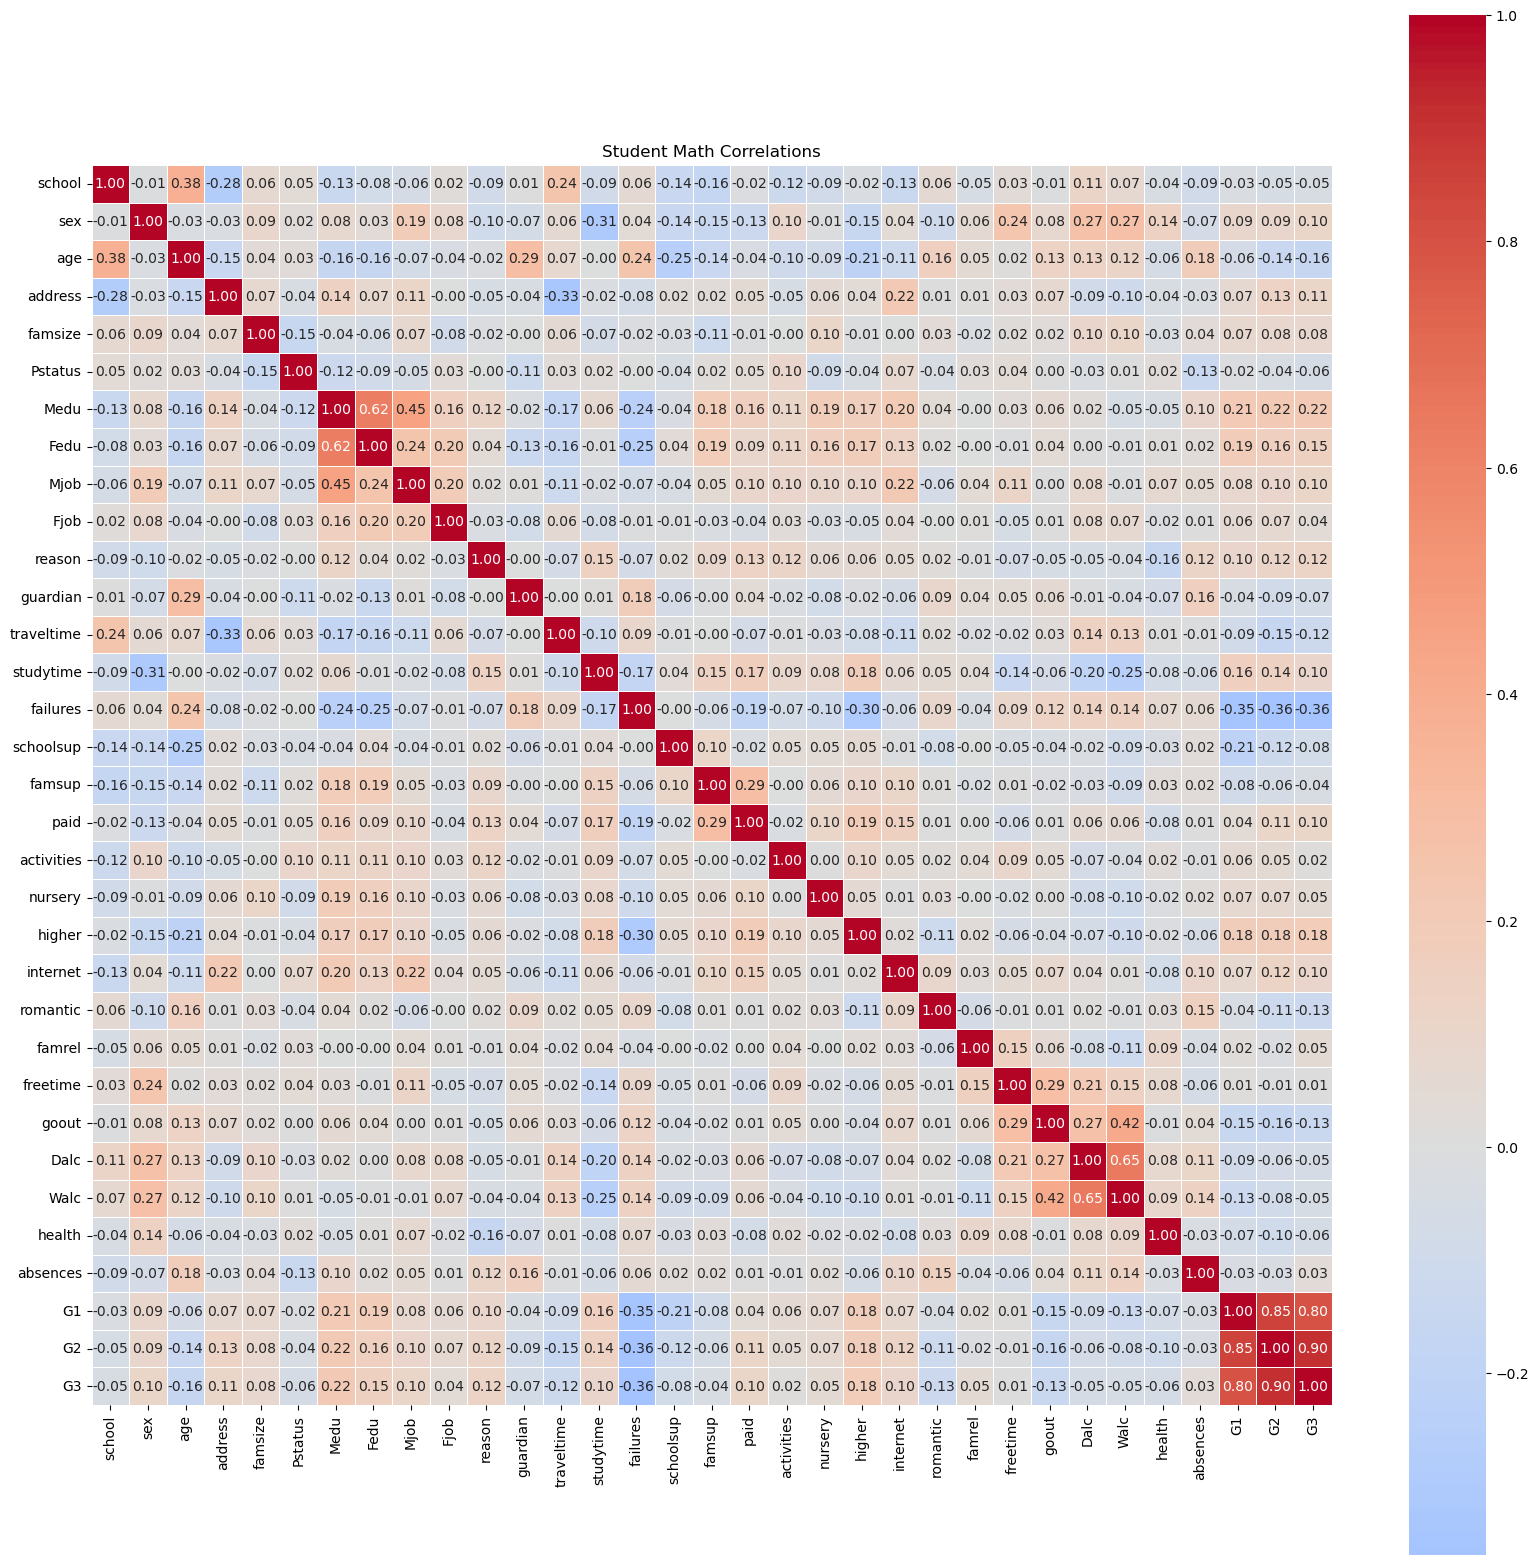

In [47]:
mat_corr = df_mat.copy()

for col in mat_corr.select_dtypes(include=['object']).columns:
    mat_corr[col] = mat_corr[col].astype('category').cat.codes

mat_corr = mat_corr.corr()

plt.figure(figsize=(20,20))

sns.heatmap(mat_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5)

plt.title('Student Math Correlations')
plt.savefig('cm_math.png')
plt.show()

Not counting the fact that the grades in other periods correlate most strongly with each other, we can see the most important attributes in the above matrix.

For G1: failures with -0.35, Medu (mother's education level) with 0.21, and schoolsup (extra educational support) with -0.21 are the top three most influential attributes.

For G2: it's failures, Medu, and higher (interest in higher ed) with 0.18.

For G3 it is the same as G2.

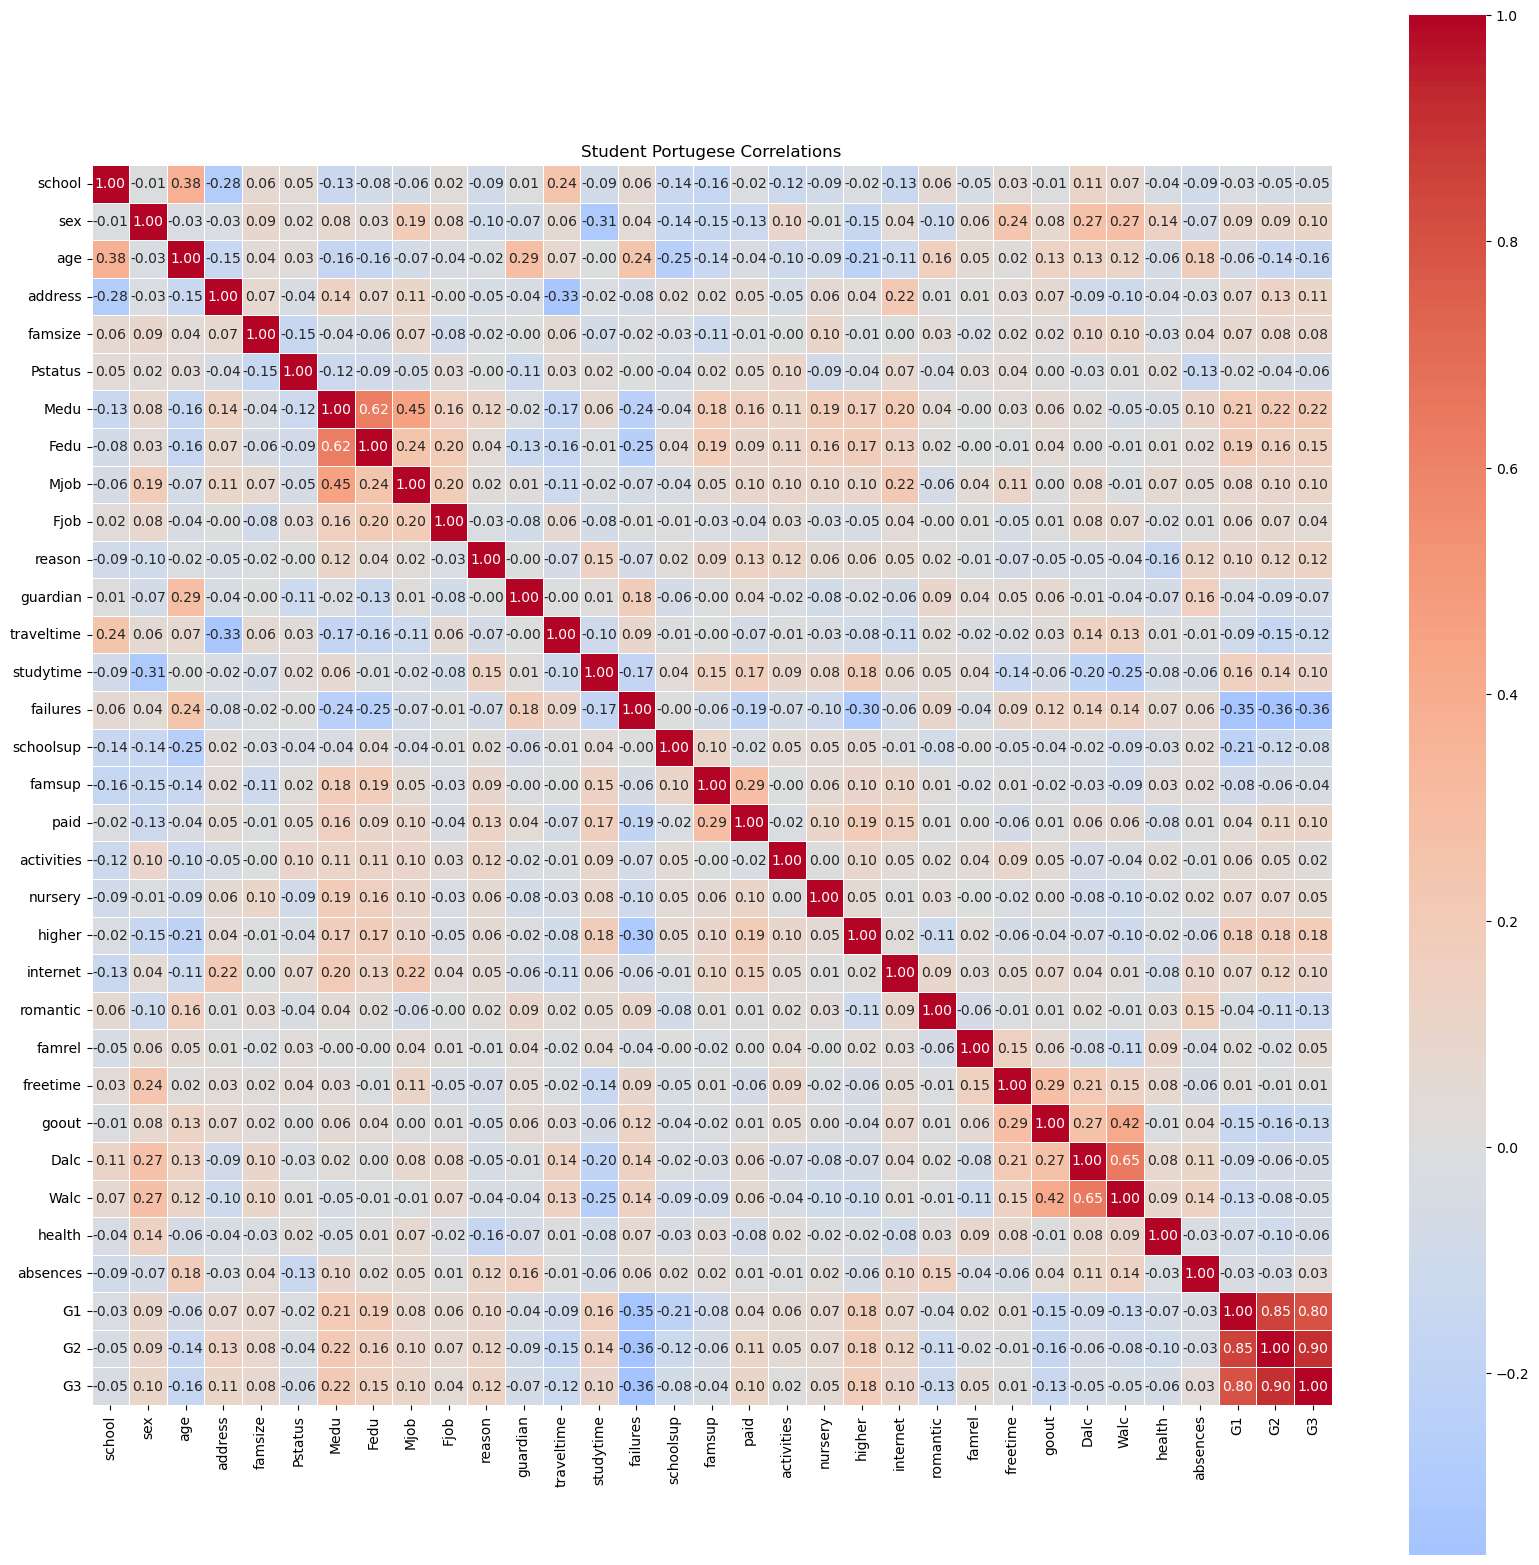

In [46]:
por_corr = df_por.copy()

for col in por_corr.select_dtypes(include=['object']).columns:
    por_corr[col] = por_corr[col].astype('category').cat.codes

por_corr = por_corr.corr()

plt.figure(figsize=(20,20))

sns.heatmap(mat_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5)

plt.title('Student Portugese Correlations')
plt.savefig('cm_por.png')
plt.show()

For the Portugese students, you can see the same results for most important attributes as we saw with the Math data.

Next, we will look at some graphs of the influence of study duration, interest in higher ed, number of failures, and romantic relationships on grades:

C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='studytime', y='G3', data=df, palette='RdBu', errorbar='sd')
C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='higher', y='G3', data=df, palette='Blues_d', errorbar='sd')
C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='failures', y='G3', data=df, pale

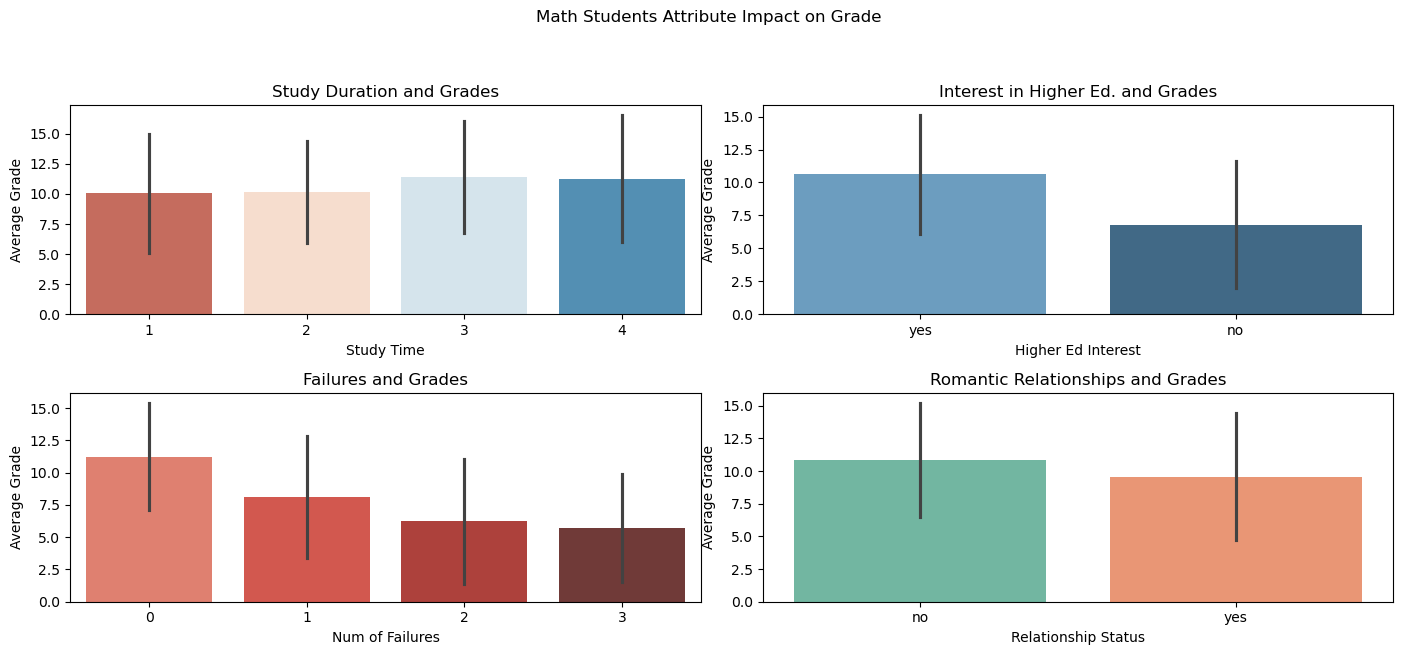

C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='studytime', y='G3', data=df, palette='RdBu', errorbar='sd')
C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='higher', y='G3', data=df, palette='Blues_d', errorbar='sd')
C:\Users\ianse\AppData\Local\Temp\ipykernel_19228\3150131154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='failures', y='G3', data=df, pale

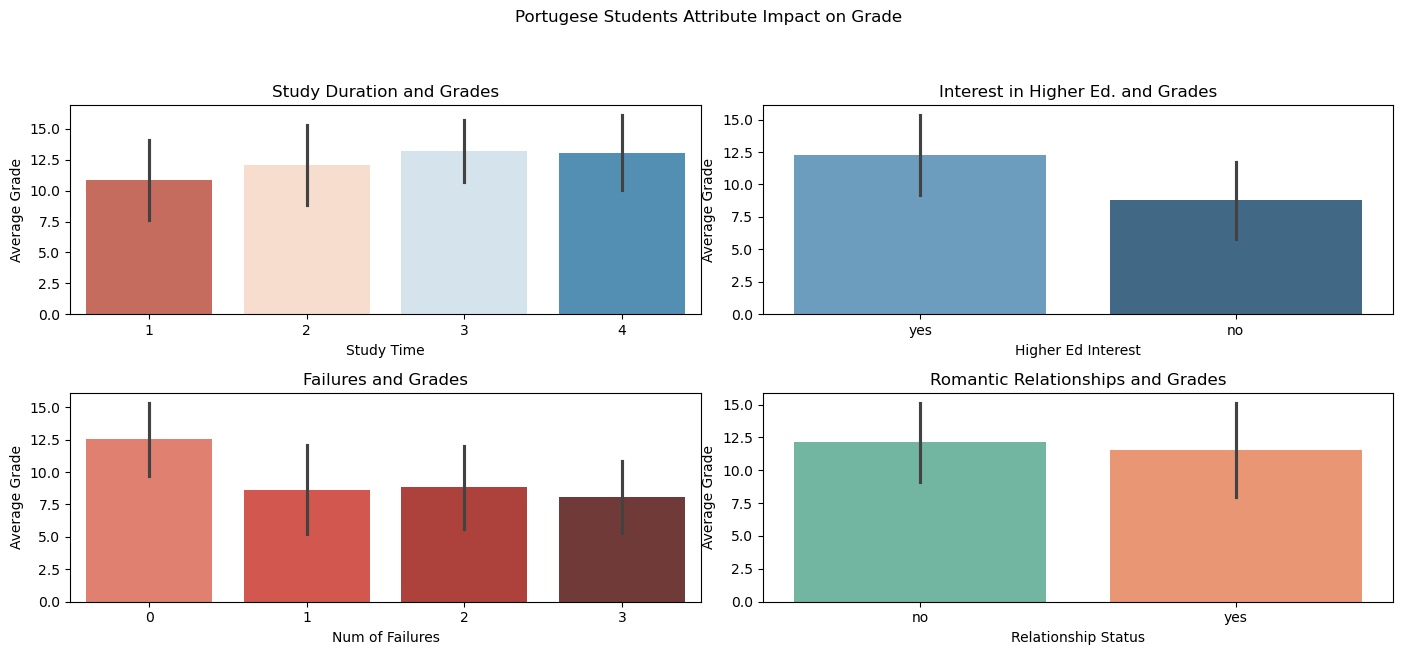

In [45]:
def plot_performance(df, subject_name):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{subject_name} Attribute Impact on Grade')

    sns.barplot(ax=axes[0, 0], x='studytime', y='G3', data=df, palette='RdBu', errorbar='sd')
    axes[0, 0].set_title('Study Duration and Grades')
    axes[0, 0].set_xlabel('Study Time')
    axes[0, 0].set_ylabel('Average Grade')

    sns.barplot(ax=axes[0, 1], x='higher', y='G3', data=df, palette='Blues_d', errorbar='sd')
    axes[0, 1].set_title('Interest in Higher Ed. and Grades')
    axes[0, 1].set_xlabel('Higher Ed Interest')
    axes[0, 1].set_ylabel('Average Grade')

    sns.barplot(ax=axes[1, 0], x='failures', y='G3', data=df, palette='Reds_d', errorbar='sd')
    axes[1, 0].set_title('Failures and Grades')
    axes[1, 0].set_xlabel('Num of Failures')
    axes[1, 0].set_ylabel('Average Grade')

    sns.barplot(ax=axes[1, 1], x='romantic', y='G3', data=df, palette='Set2', errorbar='sd')
    axes[1, 1].set_title('Romantic Relationships and Grades')
    axes[1, 1].set_xlabel('Relationship Status')
    axes[1, 1].set_ylabel('Average Grade')

    plt.tight_layout(rect=[0, 0.33, 1, 0.95])
    plt.savefig(f'{subject_name}_plot.png')
    plt.show()

plot_performance(df_mat, "Math Students")
plot_performance(df_por, "Portugese Students")
    

We can see that the average grade goes up with the amount of time spent studying but peaks at 3. Interest in higher education leads to higher grades. Number of failures negatively impacts grades. Romantic relationships also negatively impact grades.

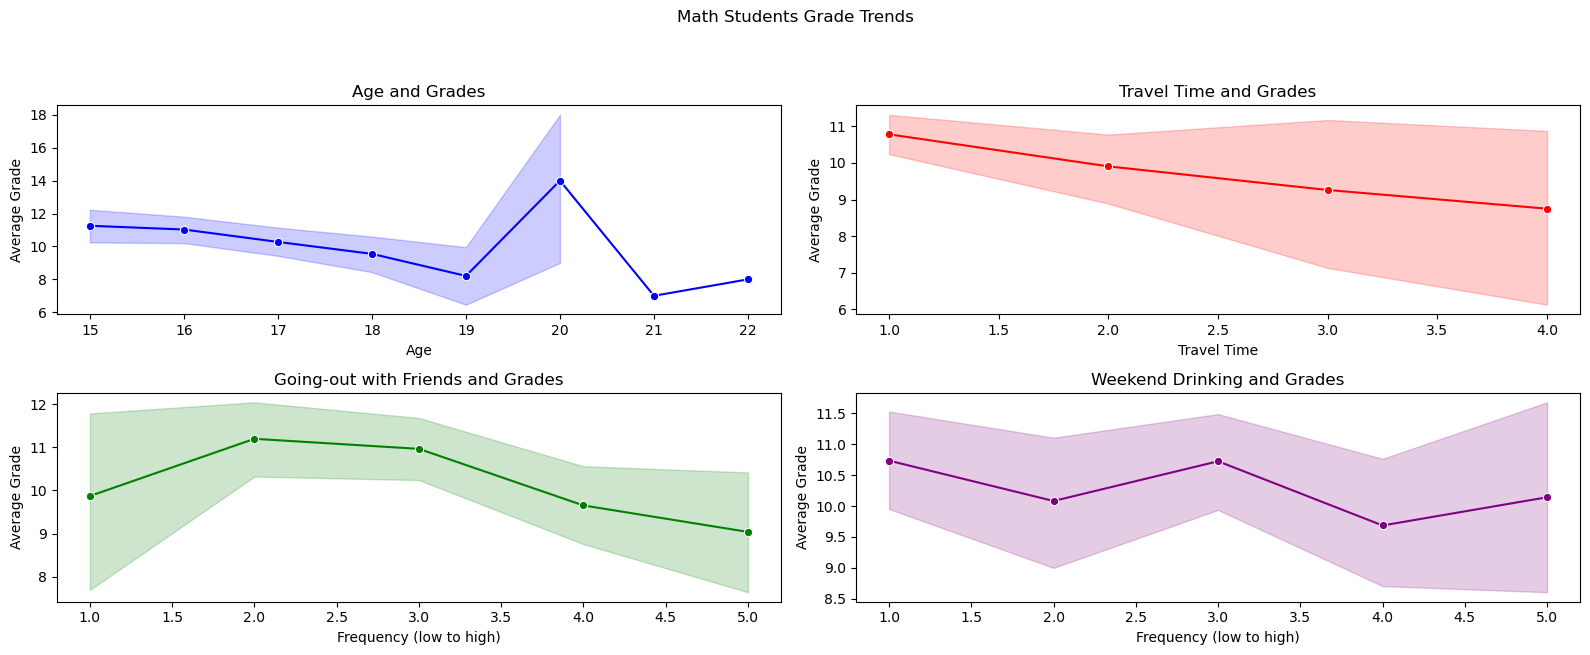

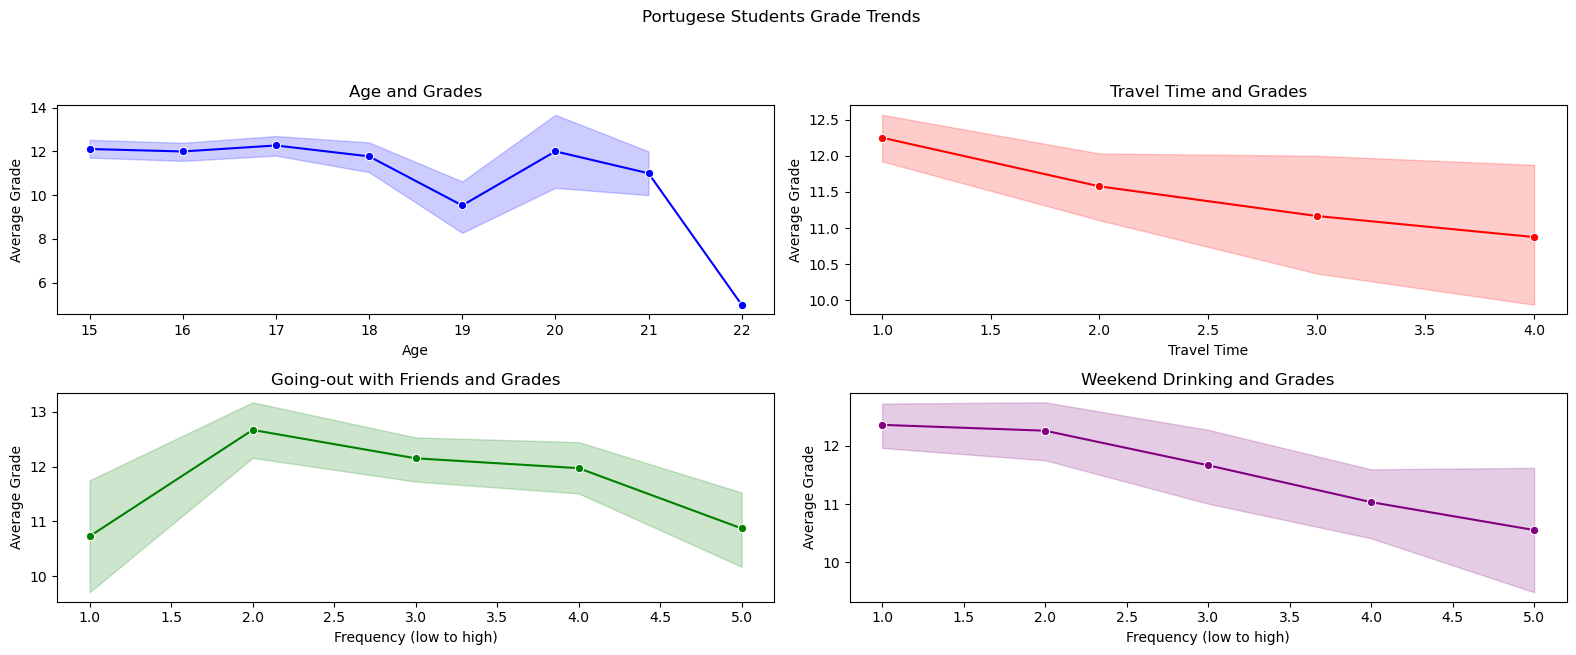

In [44]:
def plot_lines(df, subject_name):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'{subject_name} Grade Trends')

    sns.lineplot(ax=axes[0, 0], x='age', y='G3', data=df, marker='o', color='blue')
    axes[0, 0].set_title('Age and Grades')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Average Grade')

    sns.lineplot(ax=axes[0, 1], x='traveltime', y='G3', data=df, marker='o', color='red')
    axes[0, 1].set_title('Travel Time and Grades')
    axes[0, 1].set_xlabel('Travel Time')
    axes[0, 1].set_ylabel('Average Grade')

    sns.lineplot(ax=axes[1, 0], x='goout', y='G3', data=df, marker='o', color='green')
    axes[1, 0].set_title('Going-out with Friends and Grades')
    axes[1, 0].set_xlabel('Frequency (low to high)')
    axes[1, 0].set_ylabel('Average Grade')

    sns.lineplot(ax=axes[1, 1], x='Walc', y='G3', data=df, marker='o', color='purple')
    axes[1, 1].set_title('Weekend Drinking and Grades')
    axes[1, 1].set_xlabel('Frequency (low to high)')
    axes[1, 1].set_ylabel('Average Grade')

    plt.tight_layout(rect=[0, 0.33, 1, 0.95])
    plt.savefig(f'{subject_name}_lines.png')
    plt.show()

plot_lines(df_mat, "Math Students")
plot_lines(df_por, "Portugese Students")
    

We can see several interesting trends. Being 20 years old is optimal for grades in both classes, but grades go down dramatically after age 20. Travel time negatively correlates with average grade, so it is better to be near campus. Spending time with friends actually can improve grades with the least time spent with friends being as bad or worse than spending a lot of time with friends with the optimal being spending a low-moderate amount of time with friends. Weekend drinking negatively correlates with Portugese class but math does not see a strong correlation with wekend drinking with moderate drinking being as good for grades as no drinking.

## 2. Data Mining Tasks

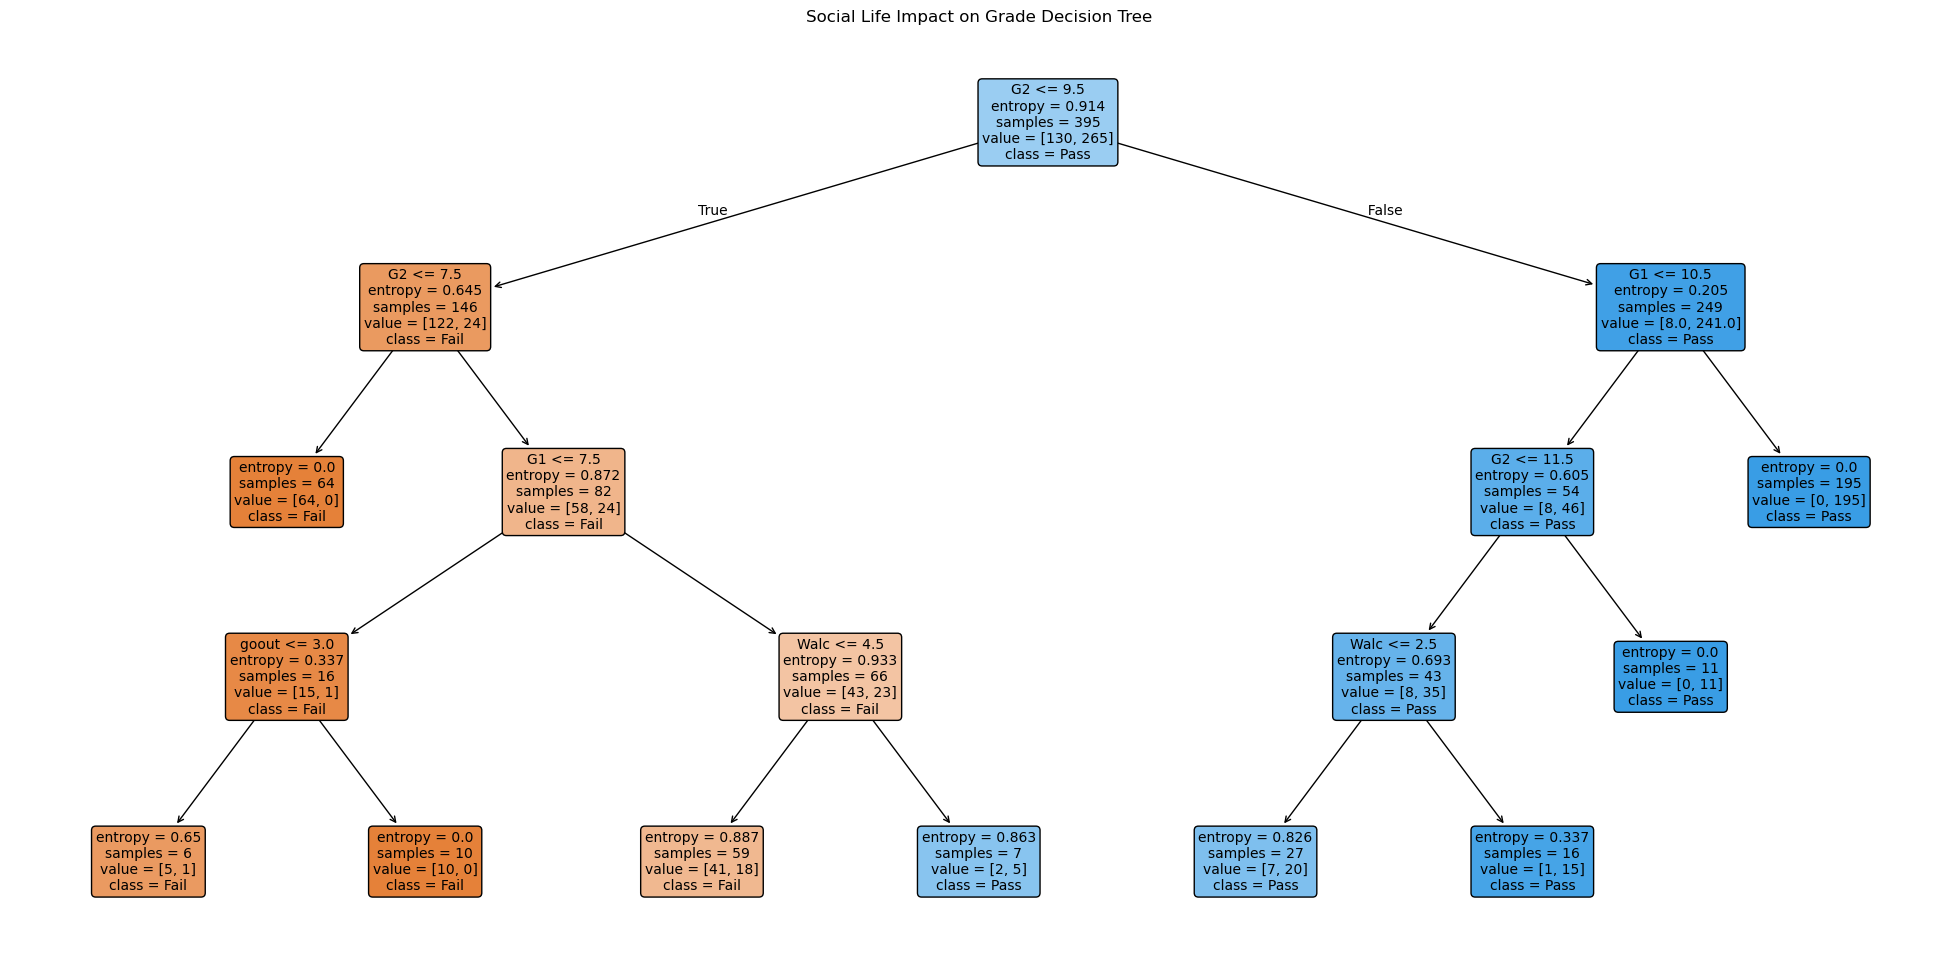

In [43]:
model_df = df_mat.copy()

feature_cols = ['G1', 'G2', 'goout', 'Walc', 'romantic']

model_df['romantic'] = model_df['romantic'].map({'yes': 1, 'no': 0})

# convert pass/fail to 1/0, else keep the value:
model_df['final_outcome'] = model_df['G3'].apply(lambda x: 'Pass' if x >=10 else 'Fail')

X = model_df[feature_cols]
y = model_df['final_outcome']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(25, 12))
plot_tree(clf, feature_names=feature_cols, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)

plt.title("Social Life Impact on Grade Decision Tree")
plt.savefig('decision_tree.png')
plt.show()

The decision tree reveals a couple of interesting potential rules, particularly on the students who are on the left side and borderline on failing. Students who are struggling in the classes, but limit how much they go out are less likely to fail (but still might). However, the students who drink on weekends see a very surprising result: those who drink very heavily on weekends are actually more likely to pass than those who do not when they are struggling with their grades. However, this could be skewed by sample size. On the right side, we see that if you are not struggling with grades, you will most likely pass but if you drink more on weekends, you are actually even more likely to pass.

### Naive Bayes

Next, we will use Naive Bayes to create binary targets and to predict whether studens will pass or fail.

In [29]:
df_por['passed'] = df_por['G3'].apply(lambda x: 1 if x >=12 else 0)

class_counts = df_por['passed'].value_counts()
class_percentages = df_por['passed'].value_counts(normalize=True) * 100

class_counts

passed
1    348
0    301
Name: count, dtype: int64

In [30]:
class_percentages

passed
1    53.620955
0    46.379045
Name: proportion, dtype: float64

We will attempt to predict results based on studytime, absences, and G1.

<Figure size 800x600 with 0 Axes>

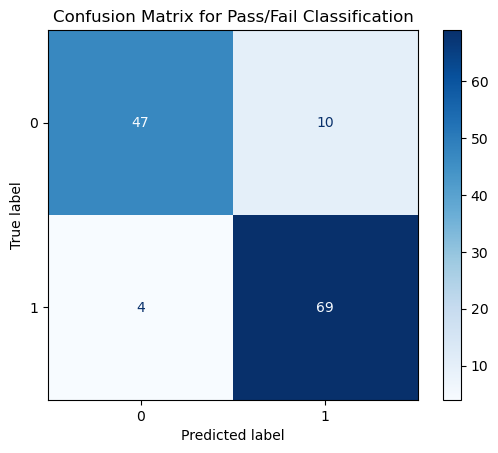

In [42]:
features_binary = ['studytime', 'absences', 'G1']
X_bin = df_por[features_binary]
y_bin = df_por['passed']

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

plt.figure(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Pass/Fail Classification')
plt.savefig('pred_cm1.png')
plt.show()

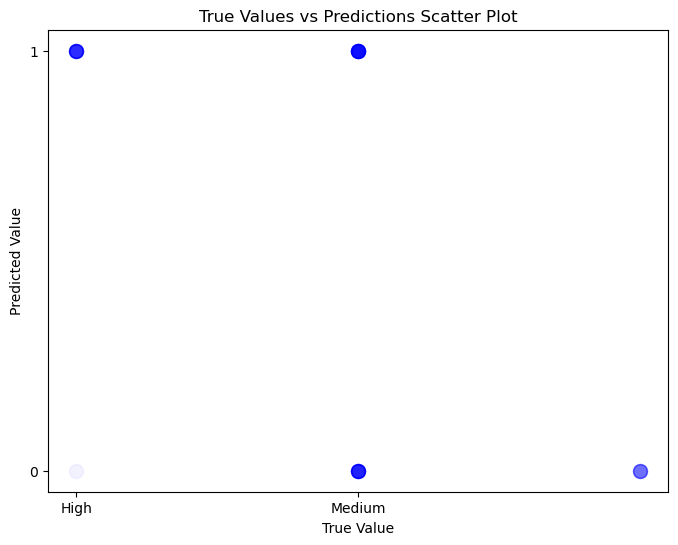

In [41]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.05, c='blue', s=100)

plt.title('True Values vs Predictions Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

plt.xticks([0, 1])
plt.yticks([0, 1])

plt.savefig('pred_cm.png')
plt.show()

We can see that the model is accurately predicting values (more so with positives than negatives) with the predicted value and true value matching frequently.

Next, we will attempt to predict outcomes based on studytime, failures, school support, family support, and activities:

<Figure size 800x600 with 0 Axes>

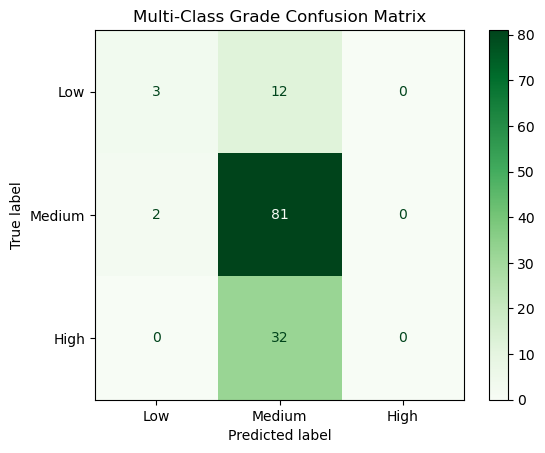

In [39]:
def categorize_grade(grade):
    if grade < 10:
        return 'Low'
    elif 10 <= grade <= 14:
        return 'Medium'
    else:
        return 'High'

df_por['grade_level'] = df_por['G3'].apply(categorize_grade)

features = ['studytime', 'failures', 'schoolsup', 'famsup', 'activities']

X = df_por[features].copy()

for col in ['schoolsup', 'famsup', 'activities']:
    X[col] = X[col].map({'yes': 1, 'no': 0})

y = df_por['grade_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

plt.figure(figsize=(8, 6))

ConfusionMatrixDisplay.from_estimator(mnb, X_test, y_test, labels=['Low', 'Medium', 'High'], cmap='Greens')

plt.title('Multi-Class Grade Confusion Matrix')
plt.savefig('grade_cm.png')
plt.show()


The model does accurately predict a lot of students receive medium grades, however it seems to over predict medium for all students.